# Theoretical Limit of the dataset
Data Classification is a process of oraganizing the data into categories or clusters. When these clusters or categories overlap with each other within the given dataset, a theretical limit for classifcation arise.

Here we tried to investigate this theretical limit for dataset by producing dummy one dimensional data of two classes from two overlapped gaussian distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

### Generating the synthetic data

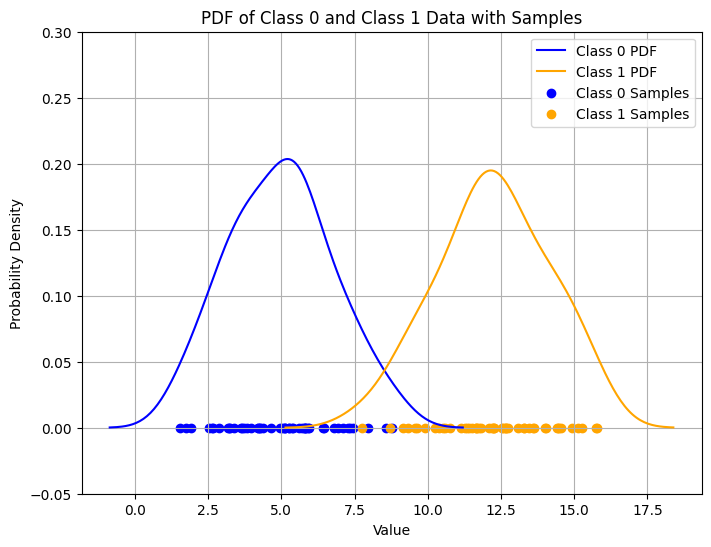

(5.0, 12.0, 2.0, 1.6666666666666667)

In [2]:
# Task 1: Generate samples for 1 dimensional data for 2 class
np.random.seed(0)
num_samples = 50
# 
label_0 = np.zeros(num_samples)
label_1 = np.ones(num_samples)

mu_1 = (19 + 9 ) / 2 - 2
sigma_1 = (19 -9) / 6
class_1_data = np.random.normal(mu_1, sigma_1, num_samples)
mu_0 = (12 / 4) + 2
sigma_0 = 12 / 6
class_0_data = np.random.normal(mu_0, sigma_0, num_samples)

plt.figure(figsize=(8, 6))

# Plot PDF of class_0 data
sns.kdeplot(class_0_data, color='blue', label='Class 0 PDF')

# Plot PDF of class_1 data
sns.kdeplot(class_1_data, color='orange', label='Class 1 PDF')

# Plot samples as balls on x-axis
plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', marker='o', label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='orange', marker='o', label='Class 1 Samples')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF of Class 0 and Class 1 Data with Samples')
plt.legend()
plt.ylim(-0.05, .3)
plt.grid(True)
plt.show()

mu_0, mu_1, sigma_0, sigma_1


In [3]:
# Create a dataframe 
data  =  np.concatenate((class_0_data, class_1_data)) 
labels = np.concatenate((label_0, label_1))

d = {
    "feature": data,
    "Label": labels
}
df = pd.DataFrame(data =d)
df.head(), df.tail()

(    feature  Label
 0  3.209067    0.0
 1  5.773805    0.0
 2  3.978390    0.0
 3  2.638736    0.0
 4  4.943636    0.0,
       feature  Label
 95  11.269876    1.0
 96   9.912008    1.0
 97  13.295817    1.0
 98   9.310170    1.0
 99  11.645433    1.0)

In [4]:
# Finding the Intersection point between two pdf and the area of the overlapped region
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = df['feature']

pdf0 = norm.pdf(samples, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(samples, loc=mu_1, scale=sigma_1)

print((pdf0 == pdf1).any())
intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # array index value

print(f"Intersection point: {samples[intersection_index]}")

cdf0 = norm.cdf(samples, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(samples, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area: {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

False
Intersection point: 8.698672552960122
0.967795364678159 0.023807051524472073
Intersection point Area: 0.05601168684631311


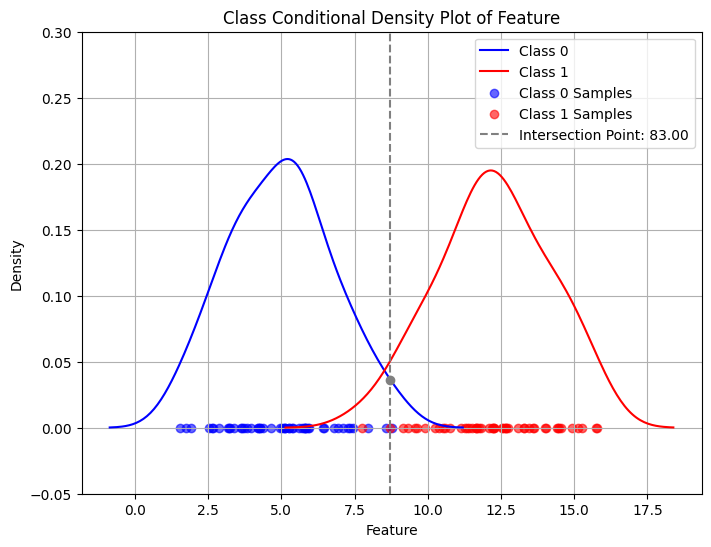

In [5]:
class_0_data = df[df['Label'] == 0]['feature']
class_1_data = df[df['Label'] == 1]['feature']

plt.figure(figsize=(8, 6))
sns.kdeplot(class_0_data, color='blue', label='Class 0')
sns.kdeplot(class_1_data, color='red', label='Class 1')

plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

# Intersection point
plt.axvline(samples[intersection_index], color='grey', linestyle='--', label=f'Intersection Point: {intersection_index:.2f}')
plt.scatter([samples[intersection_index]], [pdf0[intersection_index]], color='grey', zorder=5)

# Additional plot settings
plt.title('Class Conditional Density Plot of Feature')
plt.ylim(-0.05, .3)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()



### Ideal classifier
This is a concept of ideal classifier from - Classifiaction at the accuracy limit: facing the problem of data ambiguity.ty

Intersection point: 8.698672552960122
Data Points with True and Predicted Labels:
      feature  Label  predicted_labels
0    3.209067    0.0               0.0
1    5.773805    0.0               0.0
2    3.978390    0.0               0.0
3    2.638736    0.0               0.0
4    4.943636    0.0               0.0
..        ...    ...               ...
95  11.269876    1.0               1.0
96   9.912008    1.0               1.0
97  13.295817    1.0               1.0
98   9.310170    1.0               1.0
99  11.645433    1.0               1.0

[100 rows x 3 columns]

Confusion Matrix:
[[48  2]
 [ 1 49]]


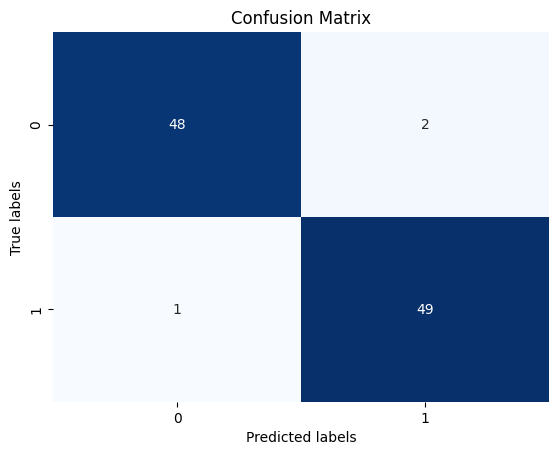


Accuracy: 0.97


In [6]:
# Ideal classifier 
intersection_index = np.argmin(np.abs((pdf0-pdf1)))
print(f"Intersection point: {samples[intersection_index]}")

predicted_labels = np.where(samples <= samples[intersection_index], 0.0, 1.0)

df["predicted_labels"] = predicted_labels

print("Data Points with True and Predicted Labels:")
print(df)

# Calculate the confusion matrix
Label = df["Label"]
TP = np.sum((Label == 1.0) & (predicted_labels == 1.0))
TN = np.sum((Label == 0.0) & (predicted_labels == 0.0))
FP = np.sum((Label == 0.0) & (predicted_labels == 1.0))
FN = np.sum((Label == 1.0) & (predicted_labels == 0.0))

confusion_matrix = np.array([[TP, FN],
                             [FP, TN]])

print("\nConfusion Matrix:")
print(confusion_matrix)
plt.figure()
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"\nAccuracy: {accuracy:.2f}")



### Logistic Regression

Logistic Regression without any test dataset
Accuracy: 0.97


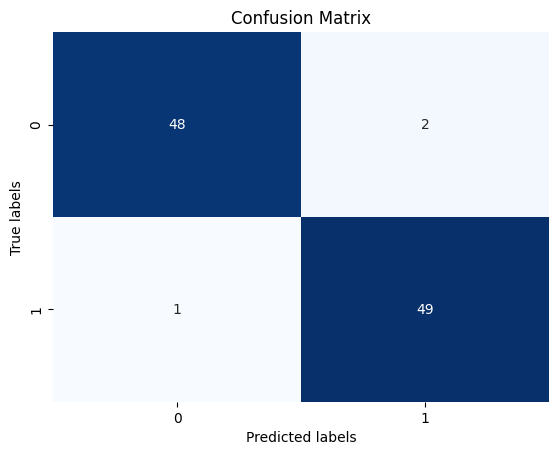

In [7]:
# Training a model Linear regression (Using all the data for training)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X, y)

# Predict testing set
y_pred = model.predict(X)

# Calculate accuracy
print("Logistic Regression without any test dataset")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm_0 = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest classifier

Random Forest classfier
Accuracy: 1.0


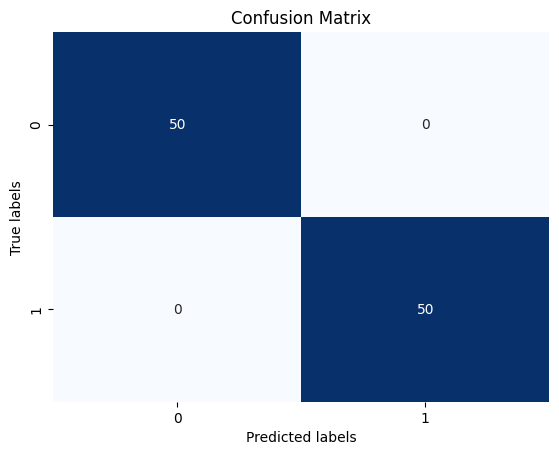

In [8]:
# Training a model Linear regression (Using all the data for training)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X, y)

# Predict testing set
y_pred = model_rf.predict(X)

# Calculate accuracy
print("Random Forest classfier")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes Classifier

Naive Bayes Estimation
Accuracy: 0.97


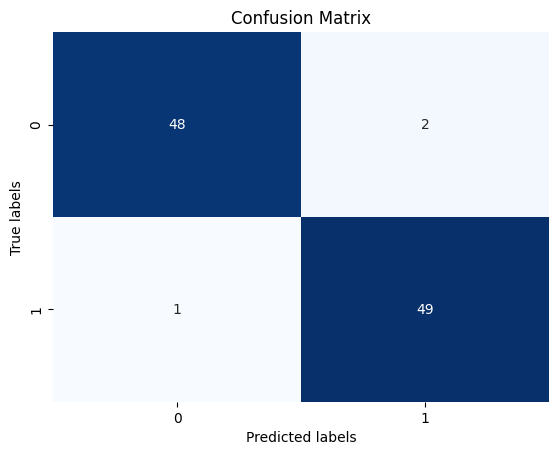

In [9]:
# Training a model with Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model_1 = GaussianNB()
model_1.fit(X, y)

y_pred = model_1.predict(X)

# Calculate the accuracy
print("Naive Bayes Estimation")
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# plotting the confusion matrix
cm1 = confusion_matrix(y, y_pred)

plt.figure()
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Linear Regression
Accuracy: 0.9
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92        12
         1.0       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



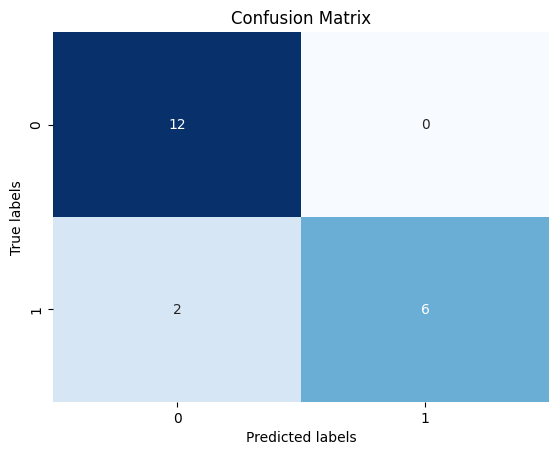

In [10]:
# Training a model Linear regression (keeping some datas for testing)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['feature']]  
y = df['Label']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the accuracy
print("Linear Regression")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### Task 2:
1. Compare the ML errors between running same method on the entire dataset (generate 1000 samples) and do the cross validation.
2. Write a function that calculate the errors based on the probabilities.
3. produce the same outpur using threshold and range method.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

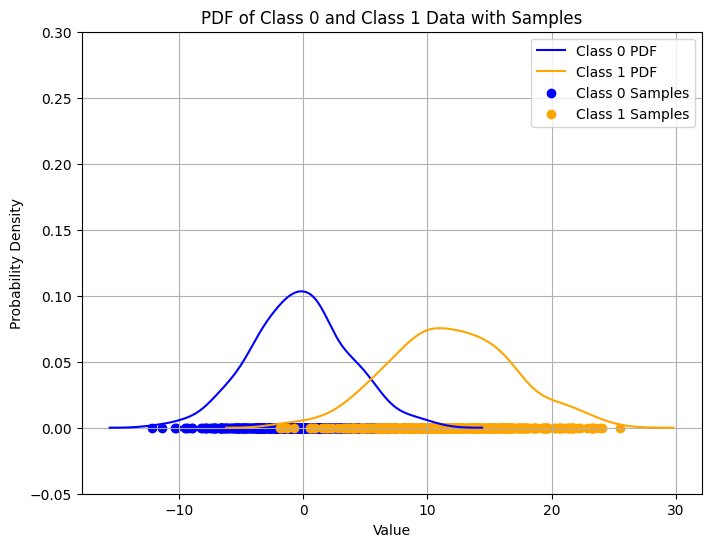

In [12]:
# Task 1: Generate (1000) samples for 1 dimensional data for 2 class
np.random.seed(0)
num_samples = 500
# 
label_0 = np.zeros(num_samples)
label_1 = np.ones(num_samples)

mu_1 = 12
sigma_1 = 5
class_1_data = np.random.normal(mu_1, sigma_1, num_samples)
mu_0 = 0
sigma_0 = 4
class_0_data = np.random.normal(mu_0, sigma_0, num_samples)

plt.figure(figsize=(8, 6))

# Plot PDF of class_0 data
sns.kdeplot(class_0_data, color='blue', label='Class 0 PDF')

# Plot PDF of class_1 data
sns.kdeplot(class_1_data, color='orange', label='Class 1 PDF')

# Plot samples as balls on x-axis
plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', marker='o', label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='orange', marker='o', label='Class 1 Samples')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDF of Class 0 and Class 1 Data with Samples')
plt.legend()
plt.ylim(-0.05, .3)
plt.grid(True)
plt.show()

In [13]:
# Create a dataframe 
data  =  np.concatenate((class_0_data, class_1_data)) 
labels = np.concatenate((label_0, label_1))

d = {
    "feature": data,
    "Label": labels
}
df = pd.DataFrame(data =d)
df.head(), df.tail(), df.shape

(    feature  Label
 0  1.530930    0.0
 1 -0.136969    0.0
 2  4.385387    0.0
 3 -0.936863    0.0
 4 -1.389803    0.0,
        feature  Label
 995  11.630377    1.0
 996   8.707235    1.0
 997   9.428830    1.0
 998   6.909791    1.0
 999  11.610726    1.0,
 (1000, 2))

Intersection point: 5.6919339860644245
0.9226295302547367 0.10354400150714421
Intersection point Area: 0.1809144712524075


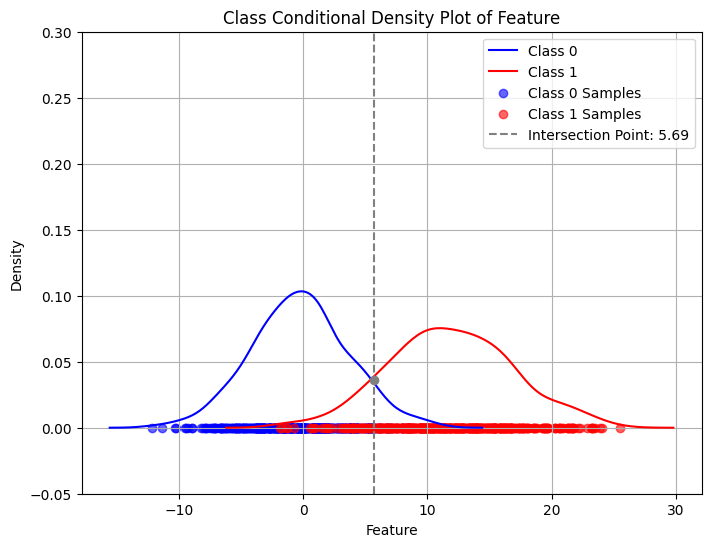

In [14]:
# Finding the Intersection point between two pdf and the area of the overlapped region
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = df['feature']

pdf0 = norm.pdf(samples, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(samples, loc=mu_1, scale=sigma_1)

intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # array index value

print(f"Intersection point: {samples[intersection_index]}")

cdf0 = norm.cdf(samples, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(samples, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area: {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

class_0_data = df[df['Label'] == 0]['feature']
class_1_data = df[df['Label'] == 1]['feature']

plt.figure(figsize=(8, 6))
sns.kdeplot(class_0_data, color='blue', label='Class 0')
sns.kdeplot(class_1_data, color='red', label='Class 1')

plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

# Intersection point
plt.axvline(samples[intersection_index], color='grey', linestyle='--', label=f'Intersection Point: {samples[intersection_index]:.2f}')
plt.scatter([samples[intersection_index]], [pdf0[intersection_index]], color='grey', zorder=5)

# Additional plot settings
plt.title('Class Conditional Density Plot of Feature')
plt.ylim(-0.05, .3)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Intersection point from training data set: 5.6919339860644245
0.9226295302547367 0.10354400150714421
Intersection point Area on the training dataset: 0.1809144712524075
0.9226295302547367 0.10354400150714421
Intersection point Area: 0.1809144712524075

Confusion Matrix:
[[94 10]
 [ 5 91]]


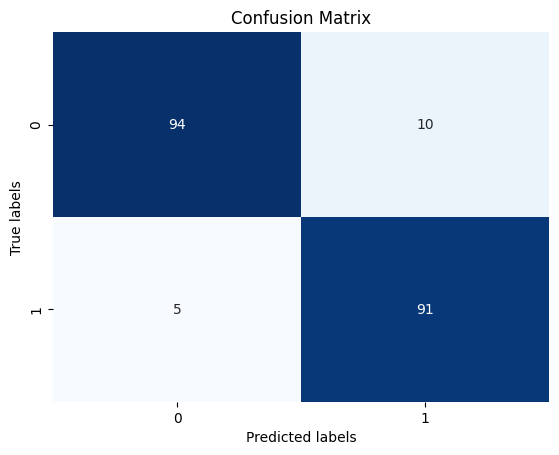


Accuracy: 0.93


((200,), (800,))

In [15]:
from sklearn.model_selection import train_test_split

X = df['feature']
y = df['Label']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ideal classifier 
#samples = df['feature']
# Using the training dataset
pdf0 = norm.pdf(X_train, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(X_train, loc=mu_1, scale=sigma_1)

intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # Using the samples as the decision boundary threshold

print(f"Intersection point from training data set: {X_train.iloc[intersection_index]}")
# the crossover region area between two pdf generate from training data points
cdf0 = norm.cdf(X_train, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(X_train, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area on the training dataset: {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

# the crossover region area between two pdf generate from test data points
cdf0 = norm.cdf(X_train, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(X_train, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area: {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

# Calculate accuracy on test data points

predicted_labels = np.where(X_test <= X_train.iloc[intersection_index], 0.0, 1.0)


# Calculate the confusion matrix
TP = np.sum((y_test == 1.0) & (predicted_labels == 1.0))
TN = np.sum((y_test == 0.0) & (predicted_labels == 0.0))
FP = np.sum((y_test == 0.0) & (predicted_labels == 1.0))
FN = np.sum((y_test == 1.0) & (predicted_labels == 0.0))

confusion_matrix = np.array([[TP, FN],
                             [FP, TN]])

print("\nConfusion Matrix:")
print(confusion_matrix)
plt.figure()
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"\nAccuracy: {accuracy:.2f}")
X_test.shape, X_train.shape

Logistic Regression without any test dataset
Accuracy: 0.92


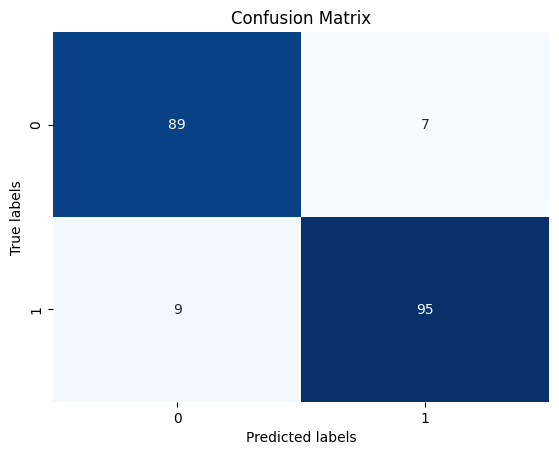

In [16]:
# Training a model Logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict testing set
y_pred = model.predict(X_test)

# Calculate accuracy
print("Logistic Regression without any test dataset")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm_0 = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Random Forest classfier
Accuracy: 0.865


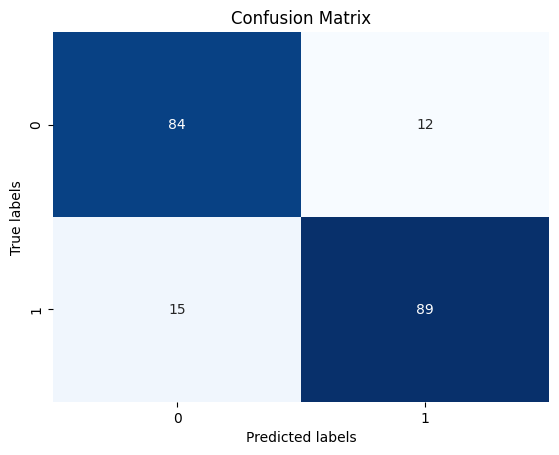

In [17]:
# Training a model Random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_rf = RandomForestClassifier(n_estimators=800, random_state=42)
model_rf.fit(X_train, y_train)

# Predict testing set
y_pred = model_rf.predict(X_test)

# Calculate accuracy
print("Random Forest classfier")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes Estimation
Accuracy: 0.925


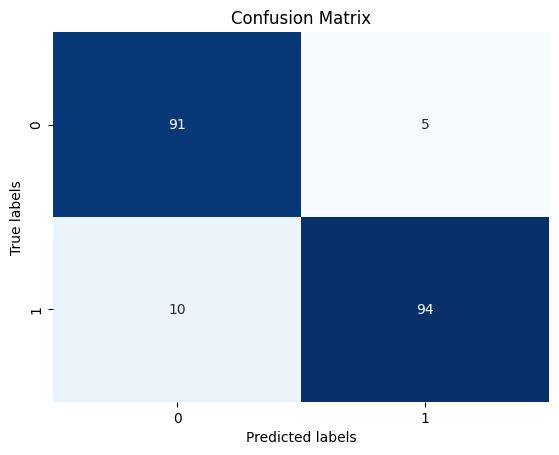

In [18]:
# Training a naive bayes classifier
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

# Calculate the accuracy
print("Naive Bayes Estimation")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# plotting the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800,), (200,))

Cost after iteration 0: 0.6931471803599453
Cost after iteration 100: 0.2210214969424237
Cost after iteration 200: 0.21696926759752988
Cost after iteration 300: 0.21648213481116238
Cost after iteration 400: 0.21640460952196536
Cost after iteration 500: 0.2163910584390947
Cost after iteration 600: 0.2163886009942619
Cost after iteration 700: 0.216388148487074
Cost after iteration 800: 0.21638806462171908
Cost after iteration 900: 0.2163880490352945
Cost after iteration 1000: 0.21638804613507795
Cost after iteration 1100: 0.21638804559514443
Cost after iteration 1200: 0.21638804549460147
Cost after iteration 1300: 0.21638804547587667
Cost after iteration 1400: 0.2163880454723891
Cost after iteration 1500: 0.2163880454717394
Cost after iteration 1600: 0.21638804547161833
Cost after iteration 1700: 0.21638804547159574
Cost after iteration 1800: 0.21638804547159154
Cost after iteration 1900: 0.21638804547159077
train accuracy: 91.25 %
test accuracy: 92.0 %
Weight and Bias:  [[0.6051109]] -3.

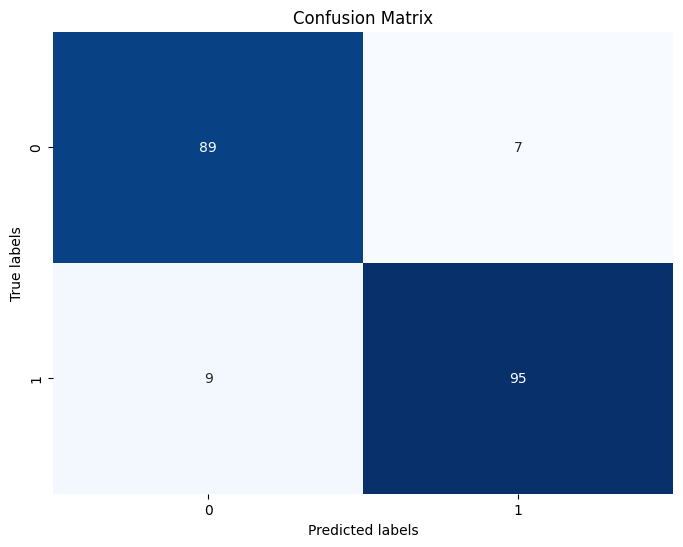

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Forward and backward propagation
def propagate(w, b, X, Y):
    m = X.shape[1]  # number of examples

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    epsilon = 1e-10  # small value to prevent log(0)
    cost = -1/m * np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))  # compute cost

    # Backward propagation
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    cost = np.squeeze(cost)  # make sure cost is a scalar

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# Optimization (gradient descent)
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []

    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost}")

    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Prediction
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    return Y_prediction

# Model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    w, b = initialize_parameters(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    return {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train": Y_prediction_train, 
        "w": w, 
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }

X = df['feature'].values
y = df['Label'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data to match the expected input shape (features x examples)
X_train = X_train.reshape(1, -1)
X_test = X_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

# Train the logistic regression model
logistic_regression_model = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.5)

# Generate predictions using the trained model
y_pred_test = logistic_regression_model["Y_prediction_test"]

# Reshape predictions and true values to match expected input shape for confusion_matrix
y_test_flat = y_test.flatten()
y_pred_test_flat = y_pred_test.flatten()

print("Weight and Bias: ", logistic_regression_model["w"], logistic_regression_model["b"])
# Plot confusion matrix
cm_0 = confusion_matrix(y_test_flat, y_pred_test_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#X_train.shape, X_test.shape, y_train.shape, y_test.shape

Decision Boundary Threshold: [5.34340861]


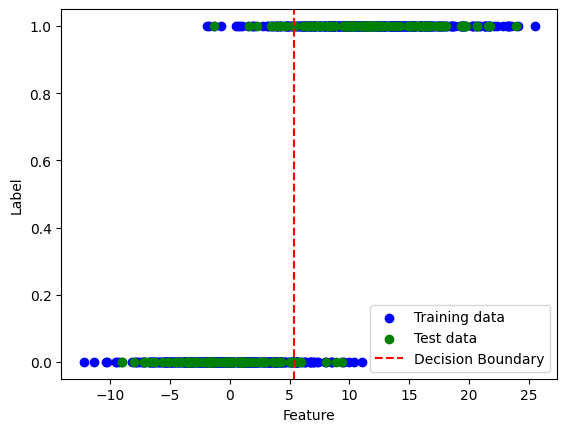

In [21]:
def find_decision_boundary(w, b):
    return -b / w

# Example weight and bias from the trained logistic regression model
w = logistic_regression_model["w"]
b = logistic_regression_model["b"]

# Since w is a 2D array, we need to flatten it to get a single value
decision_boundary_LR = find_decision_boundary(w.flatten(), b)
print("Decision Boundary Threshold:", decision_boundary_LR)

# Let's visualize it with the data
import matplotlib.pyplot as plt

# Plot the feature values
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the decision boundary
plt.axvline(x=decision_boundary_LR, color='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend()
plt.show()


Intersection point: 5.6919339860644245
Decision boundary from logistic regression: 5.34340861332852
0.9226295302547367 0.10354400150714421
Intersection point Area (Ideal Classifier): 0.1809144712524075


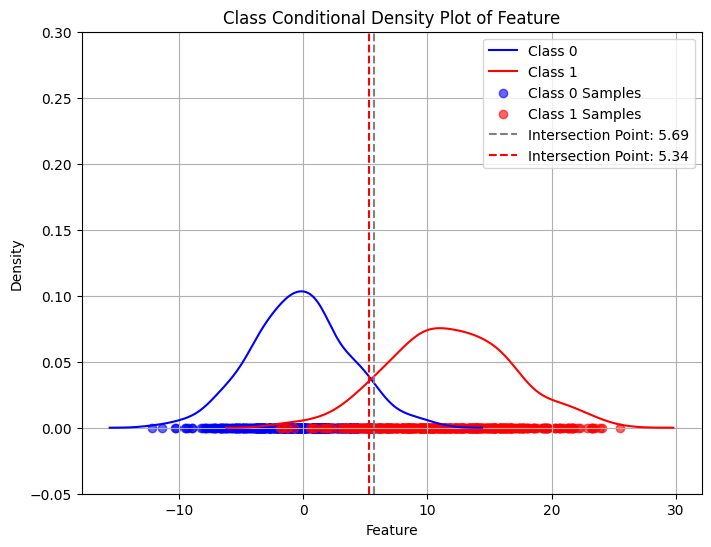

In [22]:
# Finding the Intersection point between two pdf and the area of the overlapped region
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = df['feature']

pdf0 = norm.pdf(samples, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(samples, loc=mu_1, scale=sigma_1)

intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # array index value

print(f"Intersection point: {samples[intersection_index]}")
print(f"Decision boundary from logistic regression: {decision_boundary_LR[0]}")
cdf0 = norm.cdf(samples, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(samples, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area (Ideal Classifier): {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

class_0_data = df[df['Label'] == 0]['feature']
class_1_data = df[df['Label'] == 1]['feature']

plt.figure(figsize=(8, 6))
sns.kdeplot(class_0_data, color='blue', label='Class 0')
sns.kdeplot(class_1_data, color='red', label='Class 1')

plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

# Intersection point
plt.axvline(samples[intersection_index], color='grey', linestyle='--', label=f'Intersection Point: {samples[intersection_index]:.2f}')
plt.axvline(decision_boundary_LR[0], color='red', linestyle='--', label=f'Intersection Point: {decision_boundary_LR[0]:.2f}')
#plt.scatter([samples[intersection_index]], [pdf0[intersection_index]], color='grey', zorder=1)

# Additional plot settings
plt.title('Class Conditional Density Plot of Feature')
plt.ylim(-0.05, .3)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Accuracy: 0.925


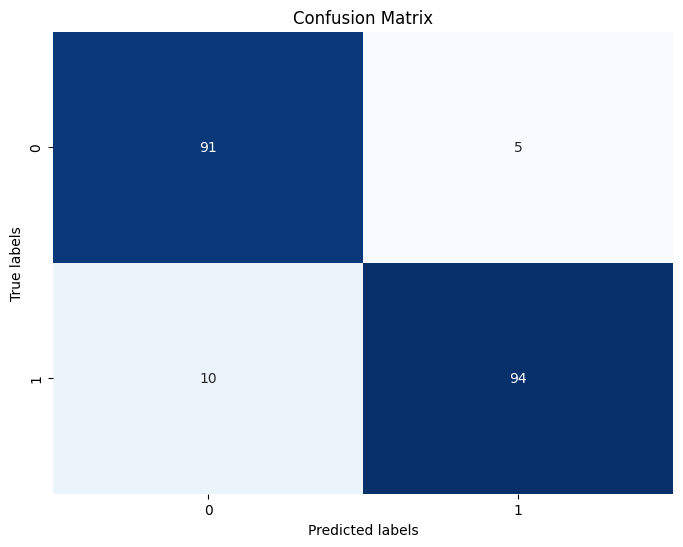

Decision Boundary Threshold(s): [-42.68596999   4.22511782]
Selected Decision Boundary Threshold: 4.225117821057342


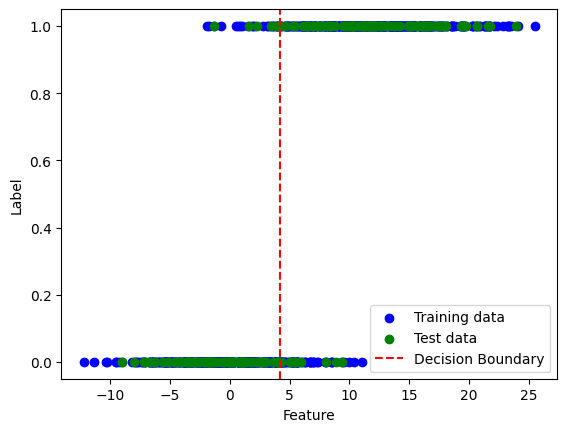

4.225117821057342

In [23]:
## Naive Bayes classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X = df['feature'].values
y = df['Label'].values

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes functions
def calculate_mean_variance(X, y):
    mean_var = {}
    classes = np.unique(y)
    for cls in classes:
        X_cls = X[y == cls]
        mean_var[cls] = {
            'mean': np.mean(X_cls),
            'var': np.var(X_cls)
        }
    return mean_var

def gaussian_pdf(x, mean, var):
    coefficient = 1 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(-(x - mean)**2 / (2 * var))
    return coefficient * exponent

def calculate_prior(y):
    classes = np.unique(y)
    prior = {}
    for cls in classes:
        prior[cls] = len(y[y == cls]) / len(y)
    return prior

def predict(X, mean_var, prior):
    posteriors = []
    for x in X:
        posteriors_cls = {}
        for cls in mean_var.keys():
            mean = mean_var[cls]['mean']
            var = mean_var[cls]['var']
            likelihood = gaussian_pdf(x, mean, var)
            posteriors_cls[cls] = prior[cls] * likelihood
        posteriors.append(max(posteriors_cls, key=posteriors_cls.get))
    return np.array(posteriors)

# Calculate mean and variance for each class
mean_var = calculate_mean_variance(X_train, y_train)

# Calculate prior probabilities for each class
prior = calculate_prior(y_train)

# Predict test set
y_pred = predict(X_test, mean_var, prior)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Find the decision boundary threshold
mean_0 = mean_var[0]['mean']
var_0 = mean_var[0]['var']
mean_1 = mean_var[1]['mean']
var_1 = mean_var[1]['var']

def find_decision_boundary(mean_0, var_0, mean_1, var_1, prior_0, prior_1):
    a = 1 / (2 * var_0) - 1 / (2 * var_1)
    b = mean_1 / var_1 - mean_0 / var_0
    c = (mean_0**2 / (2 * var_0)) - (mean_1**2 / (2 * var_1)) + np.log((var_1 / var_0) * (prior_0 / prior_1))
    return np.roots([a, b, c])

decision_boundary = find_decision_boundary(mean_0, var_0, mean_1, var_1, prior[0], prior[1])
print("Decision Boundary Threshold(s):", decision_boundary)

# Filter out the threshold within the range of the data
valid_thresholds = [db for db in decision_boundary if min(X_train) <= db <= max(X_train)]
if len(valid_thresholds) == 0:
    print("No valid decision boundary within the range of the data.")
else:
    decision_boundary = valid_thresholds[0]
    print("Selected Decision Boundary Threshold:", decision_boundary)

    # Plot the decision boundary
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Test data')

    # Plot the decision boundary
    plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')

    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.legend()
    plt.show()

decision_boundary

Intersection point: 5.6919339860644245
Decision boundary from logistic regression: 5.34340861332852
Decision boundary from Naive Bayes: 4.225117821057342
0.9226295302547367 0.10354400150714421
Intersection point Area (Ideal Classifier): 0.1809144712524075


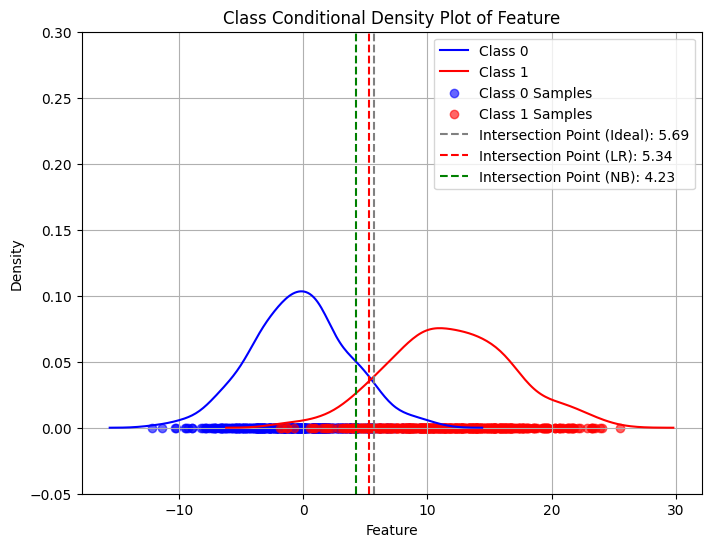

Accuracy Naive bayes: 0.925
Accuracy Logistic Regression: 0.92
Ideal Accuracy: 0.93


In [24]:
# Finding the Intersection point between two pdf and the area of the overlapped region
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

samples = df['feature']

pdf0 = norm.pdf(samples, loc=mu_0, scale=sigma_0)
pdf1 = norm.pdf(samples, loc=mu_1, scale=sigma_1)

intersection_index = np.argmin(np.abs((pdf0-pdf1)))  # array index value

print(f"Intersection point: {samples[intersection_index]}")
print(f"Decision boundary from logistic regression: {decision_boundary_LR[0]}")
print(f"Decision boundary from Naive Bayes: {decision_boundary}")

cdf0 = norm.cdf(samples, loc=mu_0, scale=sigma_0)
cdf1 = norm.cdf(samples, loc=mu_1, scale=sigma_1)
print(cdf0[intersection_index], cdf1[intersection_index])
print(f"Intersection point Area (Ideal Classifier): {(1-cdf0[intersection_index])+cdf1[intersection_index]}")

class_0_data = df[df['Label'] == 0]['feature']
class_1_data = df[df['Label'] == 1]['feature']

plt.figure(figsize=(8, 6))
sns.kdeplot(class_0_data, color='blue', label='Class 0')
sns.kdeplot(class_1_data, color='red', label='Class 1')

plt.scatter(class_0_data, np.zeros_like(class_0_data), color='blue', alpha=0.6, label='Class 0 Samples')
plt.scatter(class_1_data, np.zeros_like(class_1_data), color='red', alpha=0.6, label='Class 1 Samples')

# Intersection point
plt.axvline(samples[intersection_index], color='grey', linestyle='--', label=f'Intersection Point (Ideal): {samples[intersection_index]:.2f}')
plt.axvline(decision_boundary_LR[0], color='red', linestyle='--', label=f'Intersection Point (LR): {decision_boundary_LR[0]:.2f}')
plt.axvline(decision_boundary, color='green', linestyle='--', label=f'Intersection Point (NB): {decision_boundary:.2f}')
#plt.scatter([samples[intersection_index]], [pdf0[intersection_index]], color='grey', zorder=1)

# Additional plot settings
plt.title('Class Conditional Density Plot of Feature')
plt.ylim(-0.05, .3)
plt.xlabel('Feature')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Acccuracy for all 3
print("Accuracy Naive bayes: 0.925")
print("Accuracy Logistic Regression: 0.92")
print("Ideal Accuracy: 0.93")

In [25]:
import pandas as pd
import numpy as np
df = pd.DataFrame([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0], columns = ["Label"])
df["feature"] = [.1, .2, .31, .33, .55, .6, .35, 4, .7, .8, .25, .5]
df = df.sort_values("feature")
display(df)
diff= df["Label"].diff()
display(diff)
# df["feature"][np.abs(diff)>0]
diff = diff.bfill()
display(diff)

,Label,feature
0,0,0.10
1,0,0.20
10,1,0.25
2,0,0.31
3,0,0.33
6,1,0.35
11,0,0.50
4,1,0.55
5,1,0.60
8,0,0.70


0     NaN
1     0.0
10    1.0
2    -1.0
3     0.0
6     1.0
11   -1.0
4     1.0
5     0.0
8    -1.0
9     1.0
7    -1.0
Name: Label, dtype: float64

0     0.0
1     0.0
10    1.0
2    -1.0
3     0.0
6     1.0
11   -1.0
4     1.0
5     0.0
8    -1.0
9     1.0
7    -1.0
Name: Label, dtype: float64

In [26]:
result = df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values + (df["feature"][np.abs(diff)>0].values - df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values) /2
result 

array([0.225, 0.28 , 0.34 , 0.425, 0.525, 0.65 , 0.75 , 2.4  ])

In [27]:
df["feature"][(np.abs(diff)>0).shift(-1, fill_value=False)].values

array([0.2 , 0.25, 0.33, 0.35, 0.5 , 0.6 , 0.7 , 0.8 ])

In [28]:
df["feature"][np.abs(diff)>0].values

array([0.25, 0.31, 0.35, 0.5 , 0.55, 0.7 , 0.8 , 4.  ])

In [29]:
(np.abs(diff)>0).shift(-1, fill_value=0)

0     False
1      True
10     True
2     False
3      True
6      True
11     True
4     False
5      True
8      True
9      True
7         0
Name: Label, dtype: object

In [30]:
[np.abs(diff)>0]

[0     False
 1     False
 10     True
 2      True
 3     False
 6      True
 11     True
 4      True
 5     False
 8      True
 9      True
 7      True
 Name: Label, dtype: bool]

     feature  Label
0  19.231125      0
1  28.617400      0
2  25.841017      0
3   4.684814      0
4  19.018067      0
Label
0    100
1    100
2    100
Name: count, dtype: int64


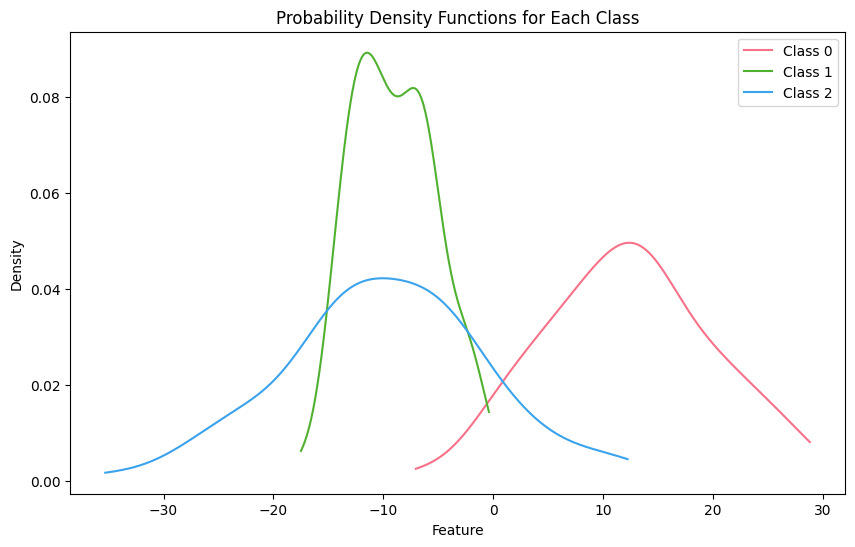

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def generate_synthetic_dataset(num_classes, num_samples_per_class):
    np.random.seed(0)
    
    data = []
    labels = []
    
    for class_num in range(num_classes):
       
        mu = np.random.uniform(-10, 30)  
        sigma = np.random.uniform(1, 10)  
        
        class_data = np.random.normal(mu, sigma, num_samples_per_class)
        class_labels = np.full(num_samples_per_class, class_num)
        
        data.append(class_data)
        labels.append(class_labels)
    
    # Concatenate data and labels for all classes
    data = np.concatenate(data)
    labels = np.concatenate(labels)
    
    # Create DataFrame
    df = pd.DataFrame({'feature': data, 'Label': labels})
    
    return df

def plot_distributions(df, num_classes):
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("husl", num_classes)
    
    for class_num in range(num_classes):
        class_data = df[df['Label'] == class_num]['feature']
        kde = gaussian_kde(class_data)
        x = np.linspace(min(class_data), max(class_data), 1000)
        y = kde(x)
        
        plt.plot(x, y, label=f'Class {class_num}', color=colors[class_num])
    
    plt.xlabel('Feature')
    plt.ylabel('Density')
    plt.title('Probability Density Functions for Each Class')
    plt.legend()
    plt.show()


num_classes = 3
num_samples_per_class = 100
df = generate_synthetic_dataset(num_classes, num_samples_per_class)
print(df.head())
print(df['Label'].value_counts())

plot_distributions(df, num_classes)


Training Accuracy: 100.00%
Node 0 splits on feature 0 at 0.8352600932121277
Left bounds: [[-10, 0.8352600932121277], [-10, 10]]
Right bounds: [[0.8352600932121277, 10], [-10, 10]]
Node 1 splits on feature 1 at 2.955018997192383
Left bounds: [[-10, 0.8352600932121277], [-10, 2.955018997192383]]
Right bounds: [[-10, 0.8352600932121277], [2.955018997192383, 10]]
Leaf node reached with bounds: [[-10, 0.8352600932121277], [-10, 2.955018997192383]]
Leaf node reached with bounds: [[-10, 0.8352600932121277], [2.955018997192383, 10]]
Node 4 splits on feature 1 at 0.6478080749511719
Left bounds: [[0.8352600932121277, 10], [-10, 0.6478080749511719]]
Right bounds: [[0.8352600932121277, 10], [0.6478080749511719, 10]]
Leaf node reached with bounds: [[0.8352600932121277, 10], [-10, 0.6478080749511719]]
Node 6 splits on feature 0 at 1.8903265595436096
Left bounds: [[0.8352600932121277, 1.8903265595436096], [0.6478080749511719, 10]]
Right bounds: [[1.8903265595436096, 10], [0.6478080749511719, 10]]
Nod

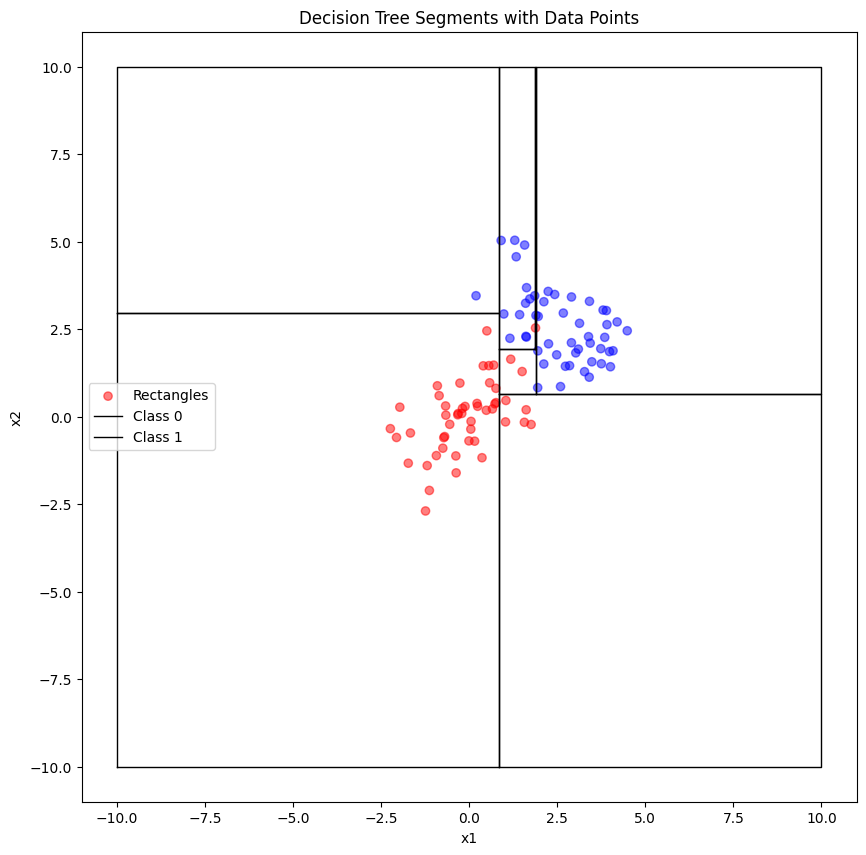

7


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, _tree
from scipy import stats

def generate_two_dimensional_data(num_samples_per_class):
    np.random.seed(0)

    # Class 0
    mean_0 = [0, 0]
    cov_0 = [[1, 0.5], [0.5, 1]]
    class_0_data = np.random.multivariate_normal(mean_0, cov_0, num_samples_per_class)
    label_0 = np.zeros(num_samples_per_class)

    # Class 1
    mean_1 = [2.5, 2.5]
    cov_1 = [[1, -0.5], [-0.5, 1]]
    class_1_data = np.random.multivariate_normal(mean_1, cov_1, num_samples_per_class)
    label_1 = np.ones(num_samples_per_class)

    # Concatenate data and labels
    data = np.vstack((class_0_data, class_1_data))
    labels = np.concatenate((label_0, label_1))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['x1', 'x2'])
    df['Label'] = labels

    return df

# Generate dataset
df = generate_two_dimensional_data(50)

X = df[['x1', 'x2']]
y = df['Label']

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf.fit(X, y)

training_accuracy = clf.score(X, y)
print(f'Training Accuracy: {training_accuracy * 100:.2f}%')

# Function to extract rules from a trained decision tree
def get_rectangles_from_tree(tree):
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    feature = tree.tree_.feature

    def recurse(node, bounds):
        if feature[node] == _tree.TREE_UNDEFINED:
            # It's a leaf node
            print(f"Leaf node reached with bounds: {bounds}")
            return [bounds]
        
        new_bounds_left = [list(b) for b in bounds]
        new_bounds_right = [list(b) for b in bounds]

        feature_index = feature[node]
        threshold_value = threshold[node]
        
        new_bounds_left[feature_index][1] = threshold_value
        new_bounds_right[feature_index][0] = threshold_value

        print(f"Node {node} splits on feature {feature_index} at {threshold_value}")
        print(f"Left bounds: {new_bounds_left}")
        print(f"Right bounds: {new_bounds_right}")
        
        left_rectangles = recurse(left[node], new_bounds_left)
        right_rectangles = recurse(right[node], new_bounds_right)

        return left_rectangles + right_rectangles

    # Initial bounds for each feature
    initial_bounds = [[-10, 10] for _ in range(tree.tree_.n_features)]
    rectangles = recurse(0, initial_bounds)
    return rectangles

# Extract rectangles from the decision tree
rectangles = get_rectangles_from_tree(clf)

# Calculate KDE for each class
class_0_data = df[df["Label"] == 0][['x1', 'x2']]
class_1_data = df[df["Label"] == 1][['x1', 'x2']]

kde_class_0 = stats.gaussian_kde(class_0_data.T)
kde_class_1 = stats.gaussian_kde(class_1_data.T)

# Calculate probabilities for the segments
segment_probabilities = []
for rect in rectangles:
    (x1_start, x1_end), (x2_start, x2_end) = rect
    segment = df[(df['x1'] >= x1_start) & (df['x1'] < x1_end) & (df['x2'] >= x2_start) & (df['x2'] < x2_end)]
    if not segment.empty:
        actual_value = segment["Label"].iloc[0]
        if actual_value == 0.0:
            segment_probabilities.append(kde_class_1.integrate_box([x1_start, x2_start], [x1_end, x2_end]))
        else:
            segment_probabilities.append(kde_class_0.integrate_box([x1_start, x2_start], [x1_end, x2_end]))

# Compute total error probability
total_error_probability_all_segments = np.sum(segment_probabilities)

print(f"Total error probability across all segments: {total_error_probability_all_segments:.4f}")
print(f"Accuracy: {1 - total_error_probability_all_segments:.4f}")

# Plotting the rectangles and data points
plt.figure(figsize=(10, 10))
colors = ['red' if label == 0 else 'blue' for label in df['Label']]
plt.scatter(df['x1'], df['x2'], c=colors, alpha=0.5, label='Data Points')

for rect in rectangles:
    (x1_start, x1_end), (x2_start, x2_end) = rect
    plt.plot([x1_start, x1_start, x1_end, x1_end, x1_start], [x2_start, x2_end, x2_end, x2_start, x2_start], 'k-', lw=1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Tree Segments with Data Points')
plt.legend(['Rectangles', 'Class 0', 'Class 1'])
plt.show()

print(len(rectangles))